In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mstats
import matplotlib.pyplot as plt

In [2]:
sc_daily_obs_df = pd.read_pickle("../01_create/sc_only_daily_obs_20240130.pkl")
sc_daily_obs_df["week"] = pd.to_datetime(sc_daily_obs_df["date"]).dt.to_period('W-SAT').dt.start_time
sc_daily_obs_df.sort_values(by=["pool_address","position_id", "date"], inplace=True)
nft_type_mapping = sc_daily_obs_df[["pool_address", "nf_position_manager_address","is_verified_sc"]].drop_duplicates()

In [3]:
non_sc_daily_obs_df = pd.read_pickle("../01_create/non_sc_only_daily_obs_20240228.pkl")
non_sc_daily_obs_df["week"] = pd.to_datetime(non_sc_daily_obs_df["date"]).dt.to_period('W-SAT').dt.start_time
non_sc_daily_obs_df.sort_values(by=["pool_address","position_id", "date"], inplace=True)

In [4]:
# read in the original data (pool action information)
pool_addrs = ['0x11b815efb8f581194ae79006d24e0d814b7697f6',
              '0x4e68ccd3e89f51c3074ca5072bbac773960dfa36',
              '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640',
              '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8']
pool_action_infos = pd.DataFrame()
for pool_addr in pool_addrs:
    pool_action_info = pd.read_csv("../../data/raw/lp_data/" + pool_addr + "_fixed.csv", low_memory=False)
    pool_action_infos = pd.concat([pool_action_infos, pool_action_info], ignore_index=True)

In [5]:
pool_action_infos["week"] = pd.to_datetime(pool_action_infos["block_timestamp"]).dt.to_period('W-SAT').dt.start_time
sc_nf_positions = sc_daily_obs_df["nf_position_manager_address"].unique()
pool_action_info_sc = pool_action_infos[pool_action_infos["nf_position_manager_address"].isin(sc_nf_positions)].copy()
pool_action_info_non_sc = pool_action_infos[~pool_action_infos["nf_position_manager_address"].isin(sc_nf_positions)].copy()

In [6]:
# By pool statistics: how many used both?
non_sc_users = pool_action_info_non_sc["liquidity_provider"].unique()
sc_users = pool_action_info_sc["liquidity_provider"].unique()
# both:
both_users = np.intersect1d(sc_users, non_sc_users)

,pool_addr,liquidity_provider,week,overall_roi,amt_roi,fee_roi,fee,amt,amt_last,amount_input,...,active_perc,sc_usage_avg,rec_usage_avg,lp_type,mean_tx_fee,sum_tx_fee,liquidity_provider_type,sc_user,liquidity_provider_switcher,switcher_and_user
917,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x0ba247c78b9041d7840c6b3babc7150b73ac58c3,2022-09-25,1.003334,0.997251,0.006083,31.033171,5087.746688,5101.771326,5101.771326,...,0.941316,1.0,0.0,sc_only,0.013291,0.277530,Verified_SC,True,Switch_To_Verified,TrueSwitch_To_Verified
918,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x0ba247c78b9041d7840c6b3babc7150b73ac58c3,2022-10-02,1.012065,1.001588,0.010477,24.749313,2365.933647,2362.183504,27.549325,...,0.946580,1.0,0.0,sc_only,0.003328,0.209645,Verified_SC,True,Switch_To_Verified,TrueSwitch_To_Verified
919,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x0ba247c78b9041d7840c6b3babc7150b73ac58c3,2022-10-09,0.998607,0.986162,0.012445,28.595795,2266.001254,2297.798037,55.294358,...,0.910715,1.0,0.0,sc_only,0.008737,0.489294,Verified_SC,True,Switch_To_Verified,TrueSwitch_To_Verified
920,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x0ba247c78b9041d7840c6b3babc7150b73ac58c3,2022-10-16,1.015473,1.007893,0.007581,25.987609,3455.213282,3428.156348,1650.718554,...,1.000000,1.0,0.0,sc_only,0.019521,0.409934,Verified_SC,True,Switch_To_Verified,TrueSwitch_To_Verified
921,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x0ba247c78b9041d7840c6b3babc7150b73ac58c3,2022-10-23,1.010210,1.008165,0.002045,7.100355,3500.058662,3471.711701,16.498418,...,1.000000,1.0,0.0,sc_only,0.010499,0.167984,Verified_SC,True,Switch_To_Verified,TrueSwitch_To_Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009589,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xffe505d1753602e36cf91e97cf71ac2a328f2ae6,2022-11-27,1.022686,1.022443,0.000243,0.247868,1044.780334,1021.846557,0.000000,...,0.569626,1.0,0.0,sc_only,0.005049,0.070687,Verified_SC,True,Switch_To_Verified,TrueSwitch_To_Verified
1009590,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xffe505d1753602e36cf91e97cf71ac2a328f2ae6,2022-12-04,1.024245,1.024122,0.000124,0.128930,1069.109754,1043.928275,0.000000,...,0.533754,1.0,0.0,sc_only,0.000000,0.000000,Verified_SC,True,Switch_To_Verified,TrueSwitch_To_Verified
1009591,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xffe505d1753602e36cf91e97cf71ac2a328f2ae6,2022-12-11,0.943200,0.942800,0.000400,0.427846,1007.956347,1069.109754,0.000000,...,0.654882,1.0,0.0,sc_only,0.000000,0.000000,Verified_SC,True,Switch_To_Verified,TrueSwitch_To_Verified
1009592,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xffe505d1753602e36cf91e97cf71ac2a328f2ae6,2022-12-18,1.025707,1.025640,0.000066,0.066783,1033.800747,1007.956347,0.000000,...,0.500000,1.0,0.0,sc_only,0.003955,0.055368,Verified_SC,True,Switch_To_Verified,TrueSwitch_To_Verified


In [7]:
verified_nft_mangers = nft_type_mapping[nft_type_mapping["is_verified_sc"]]["nf_position_manager_address"].unique()
# find out users who used verified SC?
verified_sc_users = pool_action_info_sc[pool_action_info_sc["nf_position_manager_address"].isin(verified_nft_mangers)]["liquidity_provider"].unique()
# find out users who used non-verified SC?
nonverified_sc_users = pool_action_info_sc[~pool_action_info_sc["nf_position_manager_address"].isin(verified_nft_mangers)]["liquidity_provider"].unique()
verified_switchers = np.intersect1d(verified_sc_users, non_sc_users)
non_verified_switchers = np.intersect1d(nonverified_sc_users, non_sc_users)

In [8]:
#verified_switcher_obs_non_sc = non_sc_daily_obs_df[non_sc_daily_obs_df[]]

In [48]:
non_sc_users

array(['0xb67620e8c9e19592b616942f895153e2dcf9ccb6',
       '0x741aa7cfb2c7bf2a1e7d4da2e3df6a56ca4131f3',
       '0xf705b9ba1908ca505537f309b08e6949c1b8f31f', ...,
       '0x3cbd83d4a4ee504bf8b78d9c2927a9f22f27cce5',
       '0x160694f252b907cdf3862922950142a5f1fd161a',
       '0x42b1299fcca091a83c08c24915be6e6d63906b1a'], dtype=object)

In [9]:
# note: filter out some smaller ones daily_overall_roi
#non_sc_daily_obs_df[non_sc_daily_obs_df["daily_overall_roi"] < 0.8]["week"].describe()

In [15]:
non_sc_daily_obs_df["position_id"].nunique()

100616

In [11]:
# read in the action df  data (pool action information)
import os
pool_addrs = ['0x11b815efb8f581194ae79006d24e0d814b7697f6',
              '0x4e68ccd3e89f51c3074ca5072bbac773960dfa36',
              '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640',
              '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8']
pool_action_dfs = pd.DataFrame()
for pool_addr in pool_addrs:
    action_df = pd.read_pickle(os.path.join("../../data/raw/pkl/"+ f"data_{pool_addr}_0626_no_short.pkl"))
    action_df["position_id"] = action_df["position_id"].astype(str)
    pool_action_dfs = pd.concat([pool_action_dfs, action_df], ignore_index=True)

In [16]:
pool_action_dfs

,block_number,block_timestamp,tx_hash,action,amount0_adjusted,amount1_adjusted,amount0_usd,amount1_usd,token0_price,token1_price,...,tx_fee,from_address,to_address,token_id,liquidity_mpz,position_id,custom_id,USING_UNI_STRICT,USING_UNI_RELAXED,Unnamed: 0
0,12376751,2021-05-05 21:46:12,0x5399bd3a8fa539a1899af6b3c10a526d07e5c371a0c0...,INCREASE_LIQUIDITY,0.500000,1.496808e+03,1718.717867,1.496677e+03,3437.435736,0.999913,...,0.362297,0xb2ef52180d1e5f4835f4e343251286fa84743456,0xc36442b4a4522e871399cd717abdd847ab11fe88,1000,172485837547939,1000,0xc36442b4a4522e871399cd717abdd847ab11fe88---1...,True,True,NaN
1,12376973,2021-05-05 22:30:21,0xdadf7156061bf60873adc3e363515490eb66af239eef...,DECREASE_LIQUIDITY,-0.481424,-1.399901e+03,1654.863223,1.399779e+03,3437.435736,0.999913,...,0.017560,0xb2ef52180d1e5f4835f4e343251286fa84743456,0xc36442b4a4522e871399cd717abdd847ab11fe88,1000,-163861545670542,1000,0xc36442b4a4522e871399cd717abdd847ab11fe88---1...,True,True,NaN
2,12376973,2021-05-05 22:30:21,0xdadf7156061bf60873adc3e363515490eb66af239eef...,FEE_COLLECTION,0.000000,0.000000e+00,0.000000,0.000000e+00,3437.435736,0.999913,...,0.017560,0xb2ef52180d1e5f4835f4e343251286fa84743456,0xc36442b4a4522e871399cd717abdd847ab11fe88,1000,0,1000,0xc36442b4a4522e871399cd717abdd847ab11fe88---1...,True,True,NaN
3,12376911,2021-05-05 22:18:51,0x68467f65460cc8a71eb042ad2f9c05e6f57e0927bdf1...,INCREASE_LIQUIDITY,3.623997,1.152873e+04,12457.258497,1.152773e+04,3437.435736,0.999913,...,0.030070,0xf86654e0a012e732b4b6b4233c4d118995f06e5b,0xc36442b4a4522e871399cd717abdd847ab11fe88,1136,2944954277144312,1136,0xc36442b4a4522e871399cd717abdd847ab11fe88---1...,True,True,NaN
4,12461213,2021-05-18 23:01:07,0xca5ddaae30ac41715b6bf037fa27ea5c22611417e510...,FEE_COLLECTION,0.000000,0.000000e+00,0.000000,0.000000e+00,3377.690000,1.000802,...,0.016058,0xf86654e0a012e732b4b6b4233c4d118995f06e5b,0xc36442b4a4522e871399cd717abdd847ab11fe88,1136,0,1136,0xc36442b4a4522e871399cd717abdd847ab11fe88---1...,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297609,13810919,2021-12-15 16:55:03,0xe2ffe38063a8fc948783a270a6eb8fdd21ed0569b33a...,DECREASE_LIQUIDITY,-0.000000,-1.039190e-01,0.000000,3.827658e+02,0.998831,3683.310000,...,0.031632,0xf98f2cf2668e8553bb6c619593d30543b499ddda,0x441154c08c71882d7123befce251ae9e676c9b88,-1,-354345263509828,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb--19...,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb--19...,False,False,140547.0
297610,13810919,2021-12-15 16:55:03,0xe2ffe38063a8fc948783a270a6eb8fdd21ed0569b33a...,FEE_COLLECTION,0.000000,0.000000e+00,0.000000,0.000000e+00,0.998831,3683.310000,...,0.031632,0xf98f2cf2668e8553bb6c619593d30543b499ddda,0x441154c08c71882d7123befce251ae9e676c9b88,-1,0,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb--19...,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb--19...,False,False,140546.0
297611,13810725,2021-12-15 16:14:36,0xea6bdde5960dc0d8865dd102af7ebdaae0b768993bba...,INCREASE_LIQUIDITY,0.000000,2.450000e-16,0.000000,9.024110e-13,0.998831,3683.310000,...,0.072351,0xf98f2cf2668e8553bb6c619593d30543b499ddda,0x441154c08c71882d7123befce251ae9e676c9b88,-1,1,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb--19...,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb--19...,False,False,63451.0
297612,13810919,2021-12-15 16:55:03,0xe2ffe38063a8fc948783a270a6eb8fdd21ed0569b33a...,DECREASE_LIQUIDITY,-0.000000,-2.440000e-16,0.000000,8.987276e-13,0.998831,3683.310000,...,0.031632,0xf98f2cf2668e8553bb6c619593d30543b499ddda,0x441154c08c71882d7123befce251ae9e676c9b88,-1,-1,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb--19...,0xf82aedc7faa3fe1f412c71fe5e432690c46cd1bb--19...,False,False,141273.0


In [17]:
temp_res = pd.read_csv("240124_lp_data_with_sc_and_rec_usage.csv")

In [18]:
temp_res.columns

Index(['pool_addr', 'liquidity_provider', 'week', 'overall_roi', 'amt_roi',
       'fee_roi', 'fee', 'amt', 'amt_last', 'amount_input', 'amount_output',
       'position_cnt', 'active_perc', 'sc_usage_avg', 'rec_usage_avg',
       'lp_type', 'mean_tx_fee', 'sum_tx_fee'],
      dtype='object')

In [19]:
temp_res['amt_last'].describe()

count    1.010063e+06
mean     6.791057e+04
std      1.298089e+06
min      1.080390e-14
25%      1.753199e+00
50%      2.782963e+01
75%      2.703664e+03
max      3.663180e+08
Name: amt_last, dtype: float64

In [20]:
temp_res["lp_type"].unique()

array(['manual_only', 'sc_only', 'rec_only', 'rec_and_manual_mixed'],
      dtype=object)

In [21]:
lp_type_choices_lst = ['Verified_SC', 'Nonverified_SC']
switch_to_verified_simple = temp_res["liquidity_provider"].isin(verified_sc_users)
switch_to_unverified_simple = temp_res["liquidity_provider"].isin(nonverified_sc_users)
conditions_list = [switch_to_verified_simple, switch_to_unverified_simple]
temp_res["liquidity_provider_type"] = np.select(conditions_list, lp_type_choices_lst, default='Never_SC')

In [35]:
lp_switcher_choices_lst = ['Switch_To_Verified', 'Switch_To_Nonverified']
switch_to_verified_simple = temp_res["liquidity_provider"].isin(verified_switchers)
switch_to_unverified_simple = temp_res["liquidity_provider"].isin(non_verified_switchers)
conditions_list = [switch_to_verified_simple, switch_to_unverified_simple]
temp_res["liquidity_provider_switcher"] = np.select(conditions_list, lp_switcher_choices_lst, default='Not_Switcher')

In [36]:
temp_res["sc_user"] = temp_res["liquidity_provider"].isin(both_users)

In [37]:
temp_res["sc_user"] = temp_res["sc_usage_avg"] > 0
temp_res["switcher_and_user"] = temp_res["sc_user"].astype(str) + temp_res["liquidity_provider_switcher"]

In [28]:
temp_res

(1010063, 21)

In [44]:
temp_res["liquidity_provider_switcher"].value_counts()

Not_Switcher             964075
Switch_To_Verified        45428
Switch_To_Nonverified       560
Name: liquidity_provider_switcher, dtype: int64

In [38]:
temp_res["liquidity_provider_switcher"].value_counts()

Not_Switcher             964075
Switch_To_Verified        45428
Switch_To_Nonverified       560
Name: liquidity_provider_switcher, dtype: int64

In [85]:
temp_res["switchers"] = temp_res["liquidity_provider"].isin(both_users)
temp_res["verified_user_this_lp"] = temp_res["liquidity_provider"].isin(verified_sc_users)
temp_res["non_verified_user_this_lp"] = temp_res["liquidity_provider"].isin(nonverified_sc_users)

In [86]:
temp_res_filtered = temp_res[temp_res["amt_last"] >= 100].copy()
#temp_res_filtered = temp_res.copy()
temp_res_filtered = temp_res_filtered[temp_res_filtered['week'] > '2021-05-30'].copy()


#temp_res_filtered = temp_res_filtered[temp_res_filtered["liquidity_provider_switcher"]!='Not_Switcher'].copy()

from scipy.stats.mstats import winsorize
temp_res_filtered['overall_roi_w1'] = winsorize(temp_res_filtered['overall_roi'], limits=[0.01, 0.01])
#temp_res_filtered = temp_res_filtered[temp_res_filtered["overall_roi"] >= 0.8].copy()
#temp_res_filtered = temp_res_filtered[temp_res_filtered["overall_roi"] <= 1.2].copy()
#temp_res_filtered["overall_roi_new"] = (temp_res_filtered["overall_roi"] - 1) * 100

In [55]:
position_count_table = sc_daily_obs_df.groupby(["nf_position_manager_address"])["position_id"].nunique()
more_than_one_pos_scs = position_count_table[position_count_table > 1].index.tolist()
more_than_one_pos_scs_users = pool_action_info_sc[pool_action_info_sc["nf_position_manager_address"].isin(more_than_one_pos_scs)]["liquidity_provider"].unique()

In [66]:
non_sc_daily_obs_df["position_id"]

regular_position_count_table = non_sc_daily_obs_df.groupby(["nf_position_manager_address"])["position_id"].nunique()
more_than_one_pos_scs = position_count_table[position_count_table > 1].index.tolist()
more_than_one_pos_scs_users = pool_action_info_sc[pool_action_info_sc["nf_position_manager_address"].isin(more_than_one_pos_scs)]["liquidity_provider"].unique()

Index(['position_id', 'date', 'liquidity_mpz', 'net_liquidity', 'tick_lower',
       'tick_upper', 'current_tick', 'sqrtPrice', 'amount0', 'amount1', 'fee0',
       'fee1', 'price_range', 'active_perc', 'amount0_input', 'amount1_input',
       'amount0_output', 'amount1_output', 'low', 'high', 'open', 'close',
       'low_tick', 'high_tick', 'open_tick', 'close_tick', 'volume_crypto_abs',
       'volume_stable_abs', 'volume_crypto_net', 'volume_stable_net',
       'volume_usd', 'volume_crypto_net_usd', 'volume_stable_net_usd',
       'buying_crypto_trade_cnt', 'buying_stable_trade_cnt', 'pool_address',
       'amount', 'fee', 'amount_input', 'amount_output', 'amount0_last',
       'amount1_last', 'amount_last', 'total_amount0', 'total_amount1',
       'total_amount', 'daily_overall_roi', 'daily_amount_roi',
       'daily_fee_roi', 'sc', 'week'],
      dtype='object')

In [56]:
temp_res_filtered.shape

(414340, 23)

In [87]:
temp_res_filtered['sc_cond'] = temp_res_filtered['liquidity_provider'].isin(more_than_one_pos_scs_users)
temp_res_filtered['non_sc_cond'] = temp_res_filtered['liquidity_provider'].isin(non_sc_users)
temp_res_filtered_two = temp_res_filtered[(temp_res_filtered['sc_cond'])]

In [76]:
weekly_agg_pool_level = pd.read_csv("20240308_pool_week_vars.csv")

In [79]:
temp_res_filtered.rename(columns={'pool_addr':'pool_address'}).merge(weekly_agg_pool_level, how='left', on=['week', 'pool_address'])

,pool_address,liquidity_provider,week,overall_roi,amt_roi,fee_roi,fee,amt,amt_last,amount_input,...,net_token_usd,vol_token,vol_token_usd,vol_stable,price_high,price_low,price_open,price_close,price_std,price_avg
0,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x00bd925532b308d61f663edb13f002939d893ecf,2022-07-31,1.014957,1.009533,0.005425,141.991272,26424.440415,26174.921761,26174.921761,...,-841201.04,112681.921594,1.869806e+08,1.916514e+08,3300.009584,1422.476286,1679.200817,1700.651081,48.084188,1655.945847
1,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x00bd925532b308d61f663edb13f002939d893ecf,2022-08-07,1.027420,1.022375,0.005045,182.710308,37028.401105,36218.014471,17915.129703,...,-3698779.87,203488.614831,3.755659e+08,3.778013e+08,3006.073586,1501.536171,1698.965451,1935.162223,105.353994,1863.213878
2,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x00bd925532b308d61f663edb13f002939d893ecf,2022-08-14,0.861025,0.845824,0.015201,226.599496,12608.857486,14907.180456,4948.930372,...,8173076.48,265993.548464,4.732125e+08,4.735189e+08,2419.872369,1525.895404,1936.440863,1619.383252,126.083953,1775.137235
3,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x00bd925532b308d61f663edb13f002939d893ecf,2022-08-21,0.949977,0.946239,0.003738,47.127331,11930.995663,12608.857486,0.000000,...,3150994.68,220429.939270,3.544827e+08,3.550092e+08,2469.389003,1020.273848,1619.405977,1427.198639,77.222870,1593.019009
4,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x00bd925532b308d61f663edb13f002939d893ecf,2022-08-28,1.025871,1.025871,0.000000,0.000000,17162.726056,16729.901699,4798.906036,...,-2798741.46,246539.158961,3.847452e+08,3.840675e+08,1656.315085,1359.161618,1427.647486,1577.625468,40.953197,1554.611770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414335,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xfffa09b517354968d378573c9a31d1586fd8792d,2022-11-27,1.008945,1.007554,0.001390,6.468989,4688.543698,4653.389820,3559.118161,...,-18388501.63,135920.380342,1.682570e+08,1.686177e+08,1306.468851,1150.885722,1196.632071,1284.323573,46.024856,1240.748875
414336,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xfffa09b517354968d378573c9a31d1586fd8792d,2022-12-04,0.997288,0.996303,0.000984,4.719385,4776.544269,4794.266326,3620.146620,...,3908170.42,81040.264612,1.022514e+08,1.023355e+08,1305.193675,1220.977524,1284.368958,1259.419866,19.397225,1262.643561
414337,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xfffa09b517354968d378573c9a31d1586fd8792d,2022-12-11,0.987953,0.987276,0.000677,4.121718,6010.390759,6087.855674,4907.866604,...,15887612.82,131780.254144,1.645479e+08,1.646394e+08,1351.093083,1155.882695,1258.852613,1181.528758,56.557585,1248.968218
414338,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,0xfffa09b517354968d378573c9a31d1586fd8792d,2022-12-18,1.006439,1.005251,0.001188,2.957339,2501.423567,2488.357632,1257.350996,...,-6076504.43,71145.369223,8.556827e+07,8.552659e+07,1231.536901,1153.878724,1188.650101,1215.049203,17.233559,1204.699255


In [88]:
temp_res_filtered.rename(columns={'pool_addr':'pool_address'}).merge(weekly_agg_pool_level, how='left', on=['week', 'pool_address']).to_stata('0312test5.dta')

In [75]:
temp_res_filtered["switcher_and_user"].value_counts()

FalseNot_Switcher             300216
TrueNot_Switcher               84884
TrueSwitch_To_Verified         23858
FalseSwitch_To_Verified         4936
TrueSwitch_To_Nonverified        337
FalseSwitch_To_Nonverified       109
Name: switcher_and_user, dtype: int64

In [89]:
uniswap_stata_df = pd.read_stata('uniswap0826.dta')

In [90]:
uniswap_stata_df.columns

Index(['index', 'liquidity_provider', 'week', 'amount_last_new', 'amount_new',
       'fee', 'sc', 'position_id', 'amount_input', 'amount_output',
       ...
       'active_perc_past_four', 'fee_roi_rank_past_four', 'sc_temp', 'log_buy',
       'log_sell', 'log_price', 'log_vol', 'log_price_std', 'log_tx_users',
       'any_collect_events'],
      dtype='object', length=103)

In [91]:
uniswap_stata_df["verified_sc_this_lp"] = uniswap_stata_df["liquidity_provider"].isin(verified_sc_users)
uniswap_stata_df["non_verified_sc_this_lp"] = uniswap_stata_df["liquidity_provider"].isin(nonverified_sc_users)

C:\Users\zxz170017\AppData\Local\Temp\ipykernel_6824\1126295527.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  uniswap_stata_df["verified_sc_this_lp"] = uniswap_stata_df["liquidity_provider"].isin(verified_sc_users)
C:\Users\zxz170017\AppData\Local\Temp\ipykernel_6824\1126295527.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  uniswap_stata_df["non_verified_sc_this_lp"] = uniswap_stata_df["liquidity_provider"].isin(nonverified_sc_users)


In [93]:
verified_sc_users

array(['0xa89a0e0906b2ce755f939572d698a1af29fc6c21',
       '0xf6ada09f201691a5372ec2bb31e00d86c65fd0e2',
       '0x027e54dcc0c3e34b8c4f0a1932aa81a0fe22645e', ...,
       '0xf013c1609365211a35a4e96667e46cb615d3c4b6',
       '0xc6571c2fb66825f13b7751b1c334810d397618eb',
       '0x39b52dd31c7d279b5f44b89b9d080997fab5bf9c'], dtype=object)

In [94]:
nonverified_sc_users

array(['0x7c025d529f7fb8bc2e3e39d4c3e3a86db54f4069',
       '0xa635e334b38b6ed5efafe054c5ae7f88d11d0112',
       '0x113c80169185ac465f0d38e08e2223163814ee21',
       '0x7f26bab39c6df5bff6550830486cb0b3138e827b',
       '0x18b5f62c3830668d64f859a5a71511b2132075f1',
       '0x30e8b02e0db5a05bbfc4eec38dd8b07cdbc96f12',
       '0xd26cc7c8d96f6ca5291758d266447f6879a66e16',
       '0x8e7781370d72da3859e5a58522bec6cca3e4fa1e',
       '0x11c9495c01dd67721b7f7f6c1f759b0e7b96f5f3',
       '0x6f2b8eb764bc67fe8f6c020f54a52cda99caea14',
       '0x5fbe8132ac845968e4436584e13b9a8eff8bb4c3',
       '0x7d56df5fc59957d949c6ca6fe94760af4fc4217f',
       '0x49294bbde3500bef5f2096a6d0f06a0336152b6f',
       '0x186070e5884e84a5e5f71c7077893f8217687775',
       '0xd5905f8ce56f89245fe7f3b0412e6bc0e9d806d8',
       '0xc011273eb365b11150e72456f535d2f9d8443e8e',
       '0x1607001acdfde2e76c66083b224ebab13eaf4322',
       '0x37d320fdf9e2e8760da089f66a9c50d45588e1a2',
       '0xbe2442f358e6337da91612ff63f96476e219

In [92]:
uniswap_stata_df.to_stata('0312test6.dta')

In [ ]:
# get the week before 

In [59]:
temp_res_filtered_two.to_stata('0312test4.dta')

In [46]:
temp_res_filtered["liquidity_provider"].nunique()

1000

In [69]:
temp_res_filtered_two["switcher_and_user"].value_counts()

TrueNot_Switcher              68790
TrueSwitch_To_Verified        23122
FalseSwitch_To_Verified        4660
TrueSwitch_To_Nonverified       337
FalseSwitch_To_Nonverified      109
Name: switcher_and_user, dtype: int64

In [52]:
temp_res_filtered.to_stata("0312test2.dta")

In [91]:
temp_res_filtered['overall_roi_w1'].describe()

C:\Users\zxz170017\Anaconda3\envs\uniswap_data_processing\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count    29240.000000
mean         0.997550
std          0.045378
min          0.830155
25%          0.979753
50%          1.000044
75%          1.017928
max          1.144096
Name: overall_roi_w1, dtype: float64

In [13]:
temp_res_filtered.columns

NameError: name 'temp_res_filtered' is not defined

In [94]:
temp_res_filtered["switcher_and_user"].value_counts()

TrueSwitch_To_Verified       23858
FalseSwitch_To_Verified       4936
TrueSwitch_To_Unverified       337
FalseSwitch_To_Unverified      109
Name: switcher_and_user, dtype: int64

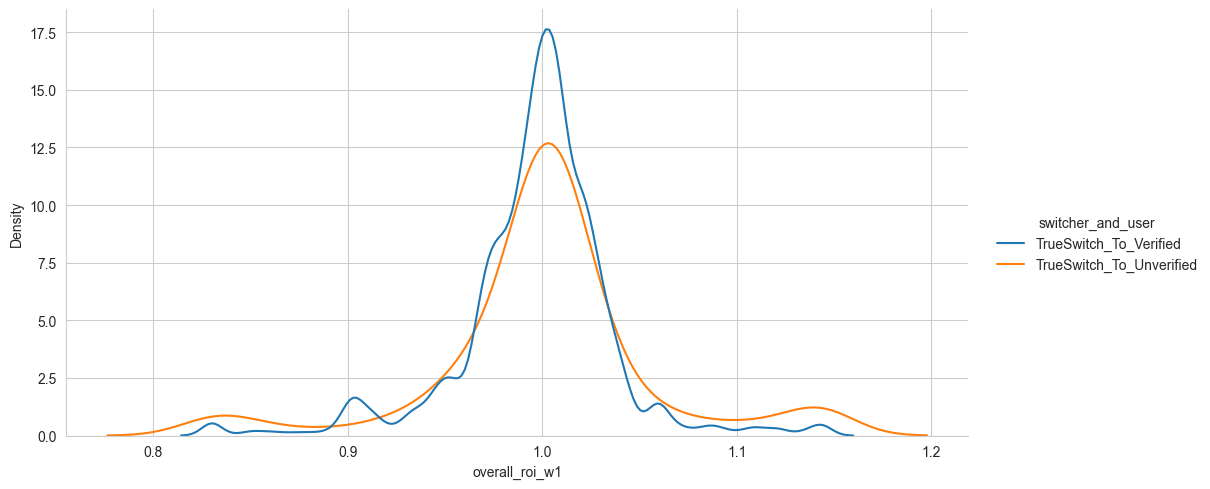

In [97]:
#temp_res_more_filtered = temp_res_filtered[temp_res_filtered['switcher_and_user'].isin(['FalseSwitch_To_Verified', 'FalseSwitch_To_Unverified'])].copy()
temp_res_more_filtered = temp_res_filtered[temp_res_filtered['switcher_and_user'].isin(['TrueSwitch_To_Verified', 'TrueSwitch_To_Unverified'])].copy()
sns.displot(data=temp_res_more_filtered, x="overall_roi_w1", hue='switcher_and_user',kind='kde', common_norm=False,aspect=2)

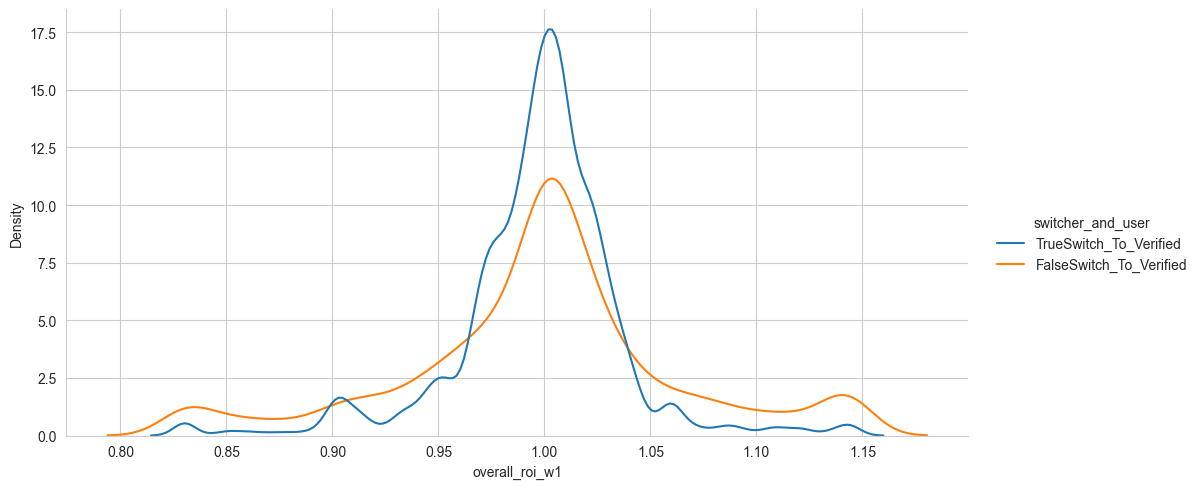

In [98]:
temp_res_more_filtered = temp_res_filtered[temp_res_filtered['switcher_and_user'].isin(['TrueSwitch_To_Verified', 'FalseSwitch_To_Verified'])].copy()
sns.displot(data=temp_res_more_filtered, x="overall_roi_w1", hue='switcher_and_user',kind='kde', common_norm=False,aspect=2)

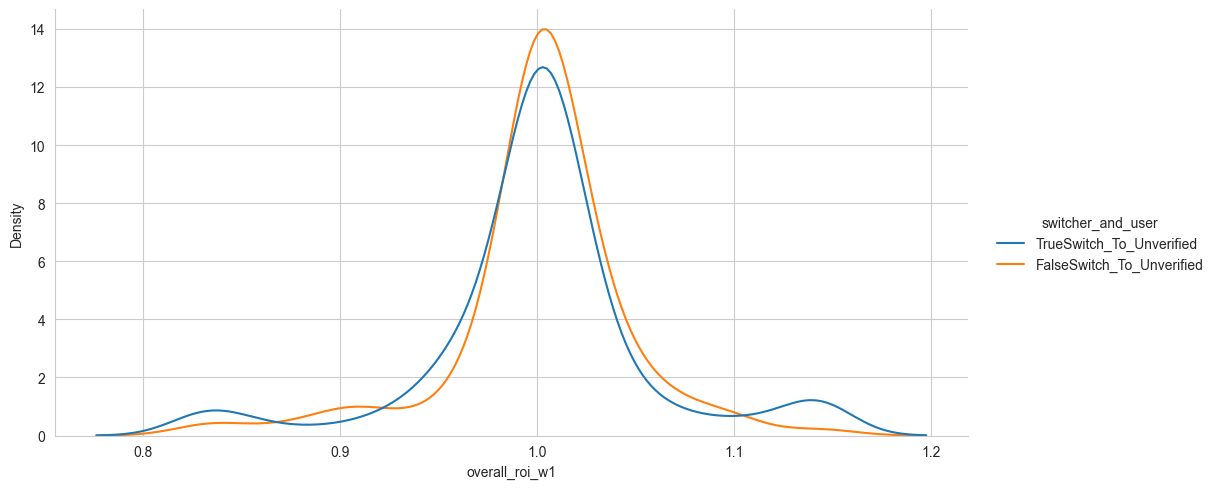

In [99]:
temp_res_more_filtered = temp_res_filtered[temp_res_filtered['switcher_and_user'].isin(['TrueSwitch_To_Unverified', 'FalseSwitch_To_Unverified'])].copy()
sns.displot(data=temp_res_more_filtered, x="overall_roi_w1", hue='switcher_and_user',kind='kde', common_norm=False,aspect=2)

In [93]:
temp_res_filtered.groupby(["switcher_and_user"])["overall_roi_w1"].describe()

C:\Users\zxz170017\Anaconda3\envs\uniswap_data_processing\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\zxz170017\Anaconda3\envs\uniswap_data_processing\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\zxz170017\Anaconda3\envs\uniswap_data_processing\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\zxz170017\Anaconda3\envs\uniswap_data_processing\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,count,mean,std,min,25%,50%,75%,max
switcher_and_user,,,,,,,,
FalseSwitch_To_Unverified,109.0,1.001594,0.045493,0.830155,1.000000,1.000000,1.017602,1.144096
FalseSwitch_To_Verified,4936.0,0.998151,0.066356,0.830155,0.968862,1.000000,1.025644,1.144096
TrueSwitch_To_Unverified,337.0,1.001169,0.057287,0.830155,0.987951,1.000098,1.016843,1.144096
TrueSwitch_To_Verified,23858.0,0.997356,0.039458,0.830155,0.981632,1.000069,1.016853,1.144096


In [81]:
temp_res_filtered[temp_res_filtered['week'] > '2021-05-30']['week'].unique()

array(['2022-07-31', '2022-08-07', '2022-08-14', '2022-08-21',
       '2022-08-28', '2022-09-04', '2022-09-11', '2022-09-18',
       '2022-09-25', '2022-10-02', '2022-10-09', '2022-10-16',
       '2022-10-23', '2022-10-30', '2022-11-06', '2022-11-13',
       '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11',
       '2022-12-18', '2022-12-25', '2021-06-27', '2021-07-04',
       '2021-07-11', '2021-07-18', '2021-07-25', '2021-08-01',
       '2021-08-08', '2021-08-15', '2021-08-22', '2021-08-29',
       '2021-09-05', '2021-09-12', '2021-11-07', '2021-11-14',
       '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31',
       '2021-11-21', '2021-11-28', '2021-12-05', '2021-12-12',
       '2021-12-19', '2021-12-26', '2022-01-02', '2022-01-09',
       '2022-01-16', '2022-01-23', '2022-01-30', '2022-02-06',
       '2022-02-13', '2022-02-20', '2022-02-27', '2022-03-06',
       '2022-03-13', '2022-03-20', '2022-03-27', '2022-04-03',
       '2022-04-10', '2022-04-17', '2022-04-24', '2022-